<a href="https://colab.research.google.com/github/sayuri-pudding/Drive_BUNNSEKI/blob/main/Ms_YUKI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#日本語をグラフに書くためのおまじない　1/2
!pip install japanize-matplotlib

In [ ]:
#日本語をグラフに書くためのおまじない2/2
import matplotlib.pyplot as plt
import japanize_matplotlib 

In [ ]:
#便利グッズ
#プロット、ラベルの提示場所指定
import matplotlib.pyplot as plt
import os
def plot(array1,array2,xlabel,ylabel,title,tatehaba):
  # plt.rcParams["figure.figsize"] = (5,3)
  plt.plot(range(len(array1)),array1,label="内発")
  plt.plot(range(len(array2)),array2,label="外発")
  plt.xticks([0,1,2,3,4],["1","2","3","4","5"])
  plt.yticks([x for x in range(0,tatehaba,2)],[x for x in range(0,tatehaba,2)])
  plt.legend()
  # plt.legend(prop={"size":15},bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
  plt.xlabel(xlabel)
  print(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.rcParams["font.size"] = (13.2)
  plt.grid(True)

def miniplot(array1,array2,xlabel,ylabel,title,tatehaba):
  plt.rcParams["figure.figsize"] = (5,3)
  plt.plot(range(len(array1)),array1,label="内発的動機付け")
  plt.plot(range(len(array2)),array2,label="外発的動機付け")
  plt.xticks([0,1,2,3,4],["1","2","3","4","5"])
  plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5],["0.0","0.1","0.2","0.3","0.4","0.5"])
  plt.legend()
  # plt.legend(prop={"size":15},bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)

#エラー除去
def path_data(path):
  p=0
  da = glob.glob(path +'*.csv')
  data=sorted(da, key=lambda s: int(re.findall(r'\d+', s)[-6]))
  k=[i for i ,x in enumerate(data) if "error" in x ]
  for i in k:
    print(k)
    del data[i-p]
    p=p+1
  return data
  
#初心者idだったらtrue  
def is_beginner(id):
  if id in [1,2,4,5,6,7,8,13,14,16,17,19,20,21,23]:
    return True
  return False

#ドレミ先軍だったらtrue
def is_doremi_first(group):
  if group=="a" or group=="c":
    return True
  return False
    
#これは全部540で割ってくれる素敵な関数
def change540(on,off):
  handon.clear()
  handoff.clear()
  for i in range(len(on)):
    handon.append(on[i]/540)
    handoff.append(off[i]/540)

In [ ]:
#配列定義
member = [[[]for j in range(35)] for j in range(28)]
for i in range(28):
  member[i][0]=i
print(member)

member_speed=[[[]for j in range(40)] for j in range(26)]
member_time=[[[]for j in range(40)] for j in range(26)]
member_handle=[[[]for j in range(40)] for j in range(26)]
member_handle540=[[[]for j in range(120)] for j in range(26)]


[[0, [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [1, [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [2, [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [3, [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [4, [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [5, [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [6, [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [7, [], [], 

In [ ]:
#修正舵回数
#option all(全長),carve(カーブ中),after(カーブ後) 
#scale tilt(傾き変化でカウント) doremi(音階変化でカウント)
import csv
import numpy as np
import math
def change_num(file,option,scale,groupid,id):
  #ファイルを開く
  csv_file=open(file,encoding = "ISO-8859-1")
  #取り出す
  f=csv.reader(csv_file)
  # a=file.split('/')[5]
  # member[id][1]=groupid
  # member[id][2]=a
  # 配列入れまくり
  next(f)
  speed.clear()
  time.clear()
  handle.clear()
  accel.clear()
  abshandle.clear()
  abshandle_carve.clear()
  abshandle_after.clear()
  for row in f:
    if row and len(row)>11:
      speed.append(float(row[4]))
      disx.append(float(row[5]))
      disz.append(float(row[7]))
      time.append(float(row[0]))
      h=0
      h=float(row[11])
      #ｈandle=ハンドルの値（小数）
      handle.append(h)
      h=abs(h)*540
      #abshandle=ハンドルの値abs表示
      abshandle.append(h)
      #ドレミ値（90°を７で割った数）
      doremi.append(int(h/(90/7)))
      accel.append(float(row[12]))
  
  sa=0
  dist.clear()
  for i in range(len(disx)-1):
    x_sa=0
    z_sa=0
    x_sa=disx[i+1]-disx[i]
    z_sa=disz[i+1]-disz[i]
    sa+=abs(x_sa)+abs(z_sa)
    dist.append(sa)
  #横が走行距離で、縦がアクセルのグラフを出したいとき
  # accel.pop(-1)
  # plt.plot(dist,accel)
  # plt.show()

  # print(str(member[id][2])+"さんの"+str(sum(abshandle)/540))
  #maxmin=最大限回している時のインデックス
  maxmin=abshandle.index(max(abshandle))
  #カーブ中のインデックス、カーブ後のインデックスを定義-------------------------
  a=0
  for i in range(len(disx)):
    a=a+1
    if abs(disx[i])<=64 and abs(disz[i])>=60 and abs(disz[i])<=124:
      carve_index.append(a)
    if abs(disx[i])>64:
      after_index.append(a)
  #カーブ中のインデックス、カーブ後のabshandle-------------------------
  #abshandle_carveはカーブ中のabs表示されたハンドル値
  #abshandle_afterはカーブ後のabs表示されたハンドル値
  for s in range(len(disx)):
    if s in carve_index:
      abshandle_carve.append(abshandle[s])
      # print("中"+str(abshandle[s]))
    if s in after_index:
      abshandle_after.append(abshandle[s])
      # print("後"+str(abshandle[s]))

  #scaleがtiltだったら------------------------------
  if scale=='tilt':
    if option=='all':
      for i in range(len(time)-1):
        angular_velocity.append(float(handle[i+1]-handle[i])/(time[i+1]-time[i]))
    if option=='carve':
      for i in range(carve_index[0]-1,carve_index[-1]-1):
        angular_velocity.append(float(handle[i+1]-handle[i])/(time[i+1]-time[i]))
    if option=='after':
      for i in range(after_index[0]-1,after_index[-1]-1):
        angular_velocity.append(float(handle[i+1]-handle[i])/(time[i+1]-time[i]))  
    
  #傾きから0とる
    only=[]
    only=([i for i in angular_velocity if i != 0])
  #カウントする
    count=0
    for i in range(len(only)-1):
      #もしマイナスの次、プラスになったら、カウント
      if only[i]<0:
        if only[i+1]>0:
          count=count+1
      #もしプラスの次、マイナスになったら、カウント
      if only[i]>0:
        if only[i+1]<0:
          count=count+1
  #配列に入れる
    a=file.split('/')[6]
    #1回目がby_tilt1
    by_tilt1.append(count)


  #scaleがdoremiだったら------------------------------
  if scale=='doremi':
    correction_num=0
    #前半
    for i in range(0, maxmin-1):
      if doremi[i]-doremi[i+1]>0:
        if option=='all':
          correction_num=correction_num+1
        if option=='carve':
          if carve_index[0]-1<=i and i<=carve_index[-1]:
            correction_num=correction_num+1
        if option=='after':
          if after_index[0]-1<=i and i<=after_index[-1]:
            correction_num=correction_num+1
    #ターニングポイント
    #後半
    for i in range(maxmin+1,len(abshandle)-1):
      if doremi[i]-doremi[i+1]<0:
        if option=='all':
          correction_num=correction_num+1
        if option=='carve':
          if carve_index[0]-1<=i and i<=carve_index[-1]:
            correction_num=correction_num+1
        if option=='after':
          if after_index[0]-1<=i and i<=after_index[-1]:
            correction_num=correction_num+1
    #配列に入れる
    a=file.split('/')[6]
    #1回目がby_tilt1
    by_doremi1.append(correction_num)

  a_c=0
  for i in range(len(accel)-1):
    # print(accel[i])
    if accel[i]==0:
      if accel[i+1]>0:
        # print("アクセルが踏まれます。")
        a_c+=1
  accel_count.append(a_c)

  #まずアクセルの値を時間で微分した配列をつくる
  a_c_t=0
  for i in range(len(accel)-1):
    a=(accel[i+1]-accel[i])/(time[i+1]-time[i])
    accel_time.append(a)

  for i in range(len(accel_time)-1):
    # print(accel_time[i])
    if accel_time[i]==0:
      if accel_time[i+1]>0:
        # print(str(time[i])+"0から増えます"+str(a_c_t))
        a_c_t+=1
  accel_count_time.append(a_c_t)
  accel_time.clear()
  angular_velocity.clear()

  vary=0
  vary2=0
  vary3=0
  #中心からずれた値
  for i in range(len(disz)):
    #最初の150_m
    if disz[i]<160:
      vary+=abs(disx[i])
    #途中のカーブ
    if disz[i]>160 and disx[i]<64:
      v=(64-disx[i])*(64-disx[i])+(disz[i]-160)*(disz[i]-160)
      va=math.sqrt(v)
      var=abs(va-64)
      vary2+=var
    #最後の150m
    if disx[i]>64:
      vary3+=abs(disz[i]-224)
  vary_count.append(vary+vary2+vary3)

  #スピードの標準偏差
  speed_h=[]
  mean=0
  for i in range(len(speed)):
    if disz[i]>110:
      speed_h.append(speed[i])
  mean=np.average(speed_h)
  speed_std.append(np.std(speed_h)/mean)

  disx.clear()
  disz.clear()
  dist.clear()
  carve_index.clear()
  after_index.clear()
  doremi.clear()

In [ ]:
import glob
import csv
import re
import matplotlib.pyplot as plt

#初期化
handle=[]
time=[]
speed=[]
angular_velocity=[]
counter=[]

maxmin=0
abshandle=[]
abshandle_carve=[]
abshandle_after=[]
doremi=[]
  
disx=[]
disz=[]
dist=[]
carve_index=[]
after_index=[]
member_path=[]

accel=[]
accel_time=[]
accel_count=[]

vary_count=[]

#全員の修正舵に気をつけた、気をつけさせられたセットのpathを入れる
#member_path(file_path,experience,hindo,)


#ばたけ！！！！！！！！！！
file_path = '/content/drive/MyDrive/Colab Notebooks/北畠/2/DriverRecording_Batake_2-677dff6e2f944e70a3896a50ce83dd5a'
file_path1 = '/content/drive/MyDrive/Colab Notebooks/北畠/3/DriverRecording'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/北畠/1/DriverRecording'
member_path.append([file_path,0,3,"A",file_path1,file_path2])

#岸！！！！！！！！！！
file_path = '/content/drive/MyDrive/Colab Notebooks/岸/2/DriverRecording_kishi_2-939b5825eff44f7a8ba17da2e029f7f2'
file_path1='/content/drive/MyDrive/Colab Notebooks/岸/3/DriverRecording'
file_path2='/content/drive/MyDrive/Colab Notebooks/岸/1/DriverRecording'
member_path.append([file_path,3,2,"B",file_path1,file_path2])

#安中！！！！！！！！！！
file_path = '/content/drive/MyDrive/Colab Notebooks/安中/3/DriverRecording_Yasunaka_3-a1cdb3289246434995f453b2e7c8d437'
file_path1='/content/drive/MyDrive/Colab Notebooks/安中/2/DriverRecording'
file_path2='/content/drive/MyDrive/Colab Notebooks/安中/1/DriverRecording'
member_path.append([file_path,3,3,"A",file_path1,file_path2])

#畑中！！！！！！！！！！
file_path = '/content/drive/MyDrive/Colab Notebooks/畑中/1/DriverRecording_Hatanaka_1-dff3ff969324446383b12c386a2070e4'
file_path1='/content/drive/MyDrive/Colab Notebooks/畑中/3/DriverRecording'
file_path2='/content/drive/MyDrive/Colab Notebooks/畑中/2/DriverRecording'
member_path.append([file_path,3,6,"B",file_path1,file_path2])

#副島！！！！！！！！！！
file_path = '/content/drive/MyDrive/Colab Notebooks/副島/1/DriverRecording_soeji_1-4599d410412a459a974cc83f5dd60f2e'
file_path1='/content/drive/MyDrive/Colab Notebooks/副島/3/DriverRecording'
file_path2='/content/drive/MyDrive/Colab Notebooks/副島/2/DriverRecording'
member_path.append([file_path,0,5,"A",file_path1,file_path2])

#平岡！！！！！！！！！！
file_path = '/content/drive/MyDrive/Colab Notebooks/平岡/2/DriverRecording_hira_2-75da5f7662eb4339a59b9b71770a10bb'
file_path1='/content/drive/MyDrive/Colab Notebooks/平岡/3/DriverRecording'
file_path2='/content/drive/MyDrive/Colab Notebooks/平岡/1/DriverRecording'
member_path.append([file_path,2,3,"B",file_path1,file_path2])

#和田！！！！！！！！！！
file_path = '/content/drive/MyDrive/Colab Notebooks/和田/3/DriverRecording_wada_3-dfb357acbf2549bfacca723eb3f926b6'
file_path1='/content/drive/MyDrive/Colab Notebooks/和田/1/DriverRecording'
file_path2='/content/drive/MyDrive/Colab Notebooks/和田/2/DriverRecording'
member_path.append([file_path,2,5,"A",file_path1,file_path2])

#櫻井！！！！！！！！！！
file_path = '/content/drive/MyDrive/Colab Notebooks/櫻井/2/DriverRecording_sakurai_2-6e3933fbc6224b32b1b3304fbca9d010'
file_path1='/content/drive/MyDrive/Colab Notebooks/櫻井/3/DriverRecording'
file_path2='/content/drive/MyDrive/Colab Notebooks/櫻井/1/DriverRecording'
member_path.append([file_path,3,6,"B",file_path1,file_path2])

#よしがい！！！！！！！！！！
file_path = '/content/drive/MyDrive/Colab Notebooks/よしがい/1/DriverRecording_yosigai_1-f071676e4eb54845ba43a458969ab0b6'
file_path1='/content/drive/MyDrive/Colab Notebooks/よしがい/3/DriverRecording'
file_path2='/content/drive/MyDrive/Colab Notebooks/よしがい/2/DriverRecording'
member_path.append([file_path,0,3,"A",file_path1,file_path2])

#田寺！！！！！！！！！！
file_path = '/content/drive/MyDrive/Colab Notebooks/田寺/1/DriverRecording_tadera_1-de9b4c7b79e74ef9b411308f784a3de2'
file_path1='/content/drive/MyDrive/Colab Notebooks/田寺/3/DriverRecording'
file_path2='/content/drive/MyDrive/Colab Notebooks/田寺/2/DriverRecording'
member_path.append([file_path,2,2,"B",file_path1,file_path2])

#守安！！！！！！！！！！
file_path = '/content/drive/MyDrive/Colab Notebooks/守安/2/DriverRecording_moriyasu_2-c3f6cd6269b84f65ba42f5423b1c1e4a'
file_path1='/content/drive/MyDrive/Colab Notebooks/守安/3/DriverRecording'
file_path2='/content/drive/MyDrive/Colab Notebooks/守安/1/DriverRecording'
member_path.append([file_path,0,4,"A",file_path1,file_path2])

#村山！！！！！！！！！！
file_path = '/content/drive/MyDrive/Colab Notebooks/村山/1/DriverRecording_murayama_1-abce1fd17257410b9a6367854ed02fc3'
file_path1='/content/drive/MyDrive/Colab Notebooks/村山/1/DriverRecording'
file_path2='/content/drive/MyDrive/Colab Notebooks/村山/1/DriverRecording'
member_path.append([file_path,3,4,"B",file_path1,file_path2])

#佐藤！！！！！！！！！！
file_path = '/content/drive/MyDrive/Colab Notebooks/佐藤/3/DriverRecording_satoon_3-2165bdecc6724c3a874401c6083c1671'
file_path1='/content/drive/MyDrive/Colab Notebooks/佐藤/1/DriverRecording'
file_path2='/content/drive/MyDrive/Colab Notebooks/佐藤/2/DriverRecording'
member_path.append([file_path,0,6,"A",file_path1,file_path2])

#尾関！！！！！！！！！！
file_path = '/content/drive/MyDrive/Colab Notebooks/尾関/1/DriverRecording_ozeki_1-fa1f22293f4045b3bdd8f8208c7aedec'
file_path1='/content/drive/MyDrive/Colab Notebooks/尾関/2/DriverRecording'
file_path2='/content/drive/MyDrive/Colab Notebooks/尾関/3/DriverRecording'
member_path.append([file_path,2,5,"B",file_path1,file_path2])

#望月！！！！！！！！！！
file_path = '/content/drive/MyDrive/Colab Notebooks/望月/1/DriverRecording_moti_1-0095313abe764b8a955e55a62ebe0a8b'
file_path1='/content/drive/MyDrive/Colab Notebooks/望月/2/DriverRecording'
file_path2='/content/drive/MyDrive/Colab Notebooks/望月/3/DriverRecording'
member_path.append([file_path,0,5,"A",file_path1,file_path2])

#もくほ！！！！！！！！！！
file_path = '/content/drive/MyDrive/Colab Notebooks/もくほ/3/DriverRecording_hanae_3-6832dbc3b030410eb5966d084055fa70'
file_path1='/content/drive/MyDrive/Colab Notebooks/もくほ/2/DriverRecording'
file_path2='/content/drive/MyDrive/Colab Notebooks/もくほ/1/DriverRecording'
member_path.append([file_path,2,3,"B",file_path1,file_path2])

#鎮守！！！！！！！！！！
file_path = '/content/drive/MyDrive/Colab Notebooks/鎮守/2/DriverRecording_tinju_2-a06a24d3a44c429b8166fbadc6ef975f'
file_path1='/content/drive/MyDrive/Colab Notebooks/鎮守/3/DriverRecording'
file_path2='/content/drive/MyDrive/Colab Notebooks/鎮守/1/DriverRecording'
member_path.append([file_path,2,4,"A",file_path1,file_path2])

#河本！！！！！！！！！！
file_path = '/content/drive/MyDrive/Colab Notebooks/河本/3/DriverRecording_koumoto_3-8289d437245c4152a60e1299b65b54af'
file_path1='/content/drive/MyDrive/Colab Notebooks/河本/2/DriverRecording'
file_path2='/content/drive/MyDrive/Colab Notebooks/河本/1/DriverRecording'
member_path.append([file_path,0,2,"B",file_path1,file_path2])

#菱田！！！！！！！！！！
file_path = '/content/drive/MyDrive/Colab Notebooks/菱田/1/DriverRecording_hisida_1-0778268d302643dea49c9eee15e5b383'
file_path1='/content/drive/MyDrive/Colab Notebooks/菱田/2/DriverRecording'
file_path2='/content/drive/MyDrive/Colab Notebooks/菱田/3/DriverRecording'
member_path.append([file_path,2,5,"A",file_path1,file_path2])

#山本！！！！！！！！！！
file_path = '/content/drive/MyDrive/Colab Notebooks/山本/3/DriverRecording_yamamoto_3-1a02c165c40b44efbb4735c93469ce39'
file_path1='/content/drive/MyDrive/Colab Notebooks/山本/1/DriverRecording'
file_path2='/content/drive/MyDrive/Colab Notebooks/山本/2/DriverRecording'
member_path.append([file_path,2,2,"B",file_path1,file_path2])

#ざわ！！！！！！！！！！
file_path = '/content/drive/MyDrive/Colab Notebooks/ざわ/3/DriverRecording_zawa_3-a7725fbd158846ccb0e11d7a657bd35d_'
file_path1='/content/drive/MyDrive/Colab Notebooks/ざわ/2/DriverRecording'
file_path2='/content/drive/MyDrive/Colab Notebooks/ざわ/1/DriverRecording'
member_path.append([file_path,0,5,"A",file_path1,file_path2])

#吉津！！！！！！！！！！
file_path = '/content/drive/MyDrive/Colab Notebooks/吉津/3/DriverRecording_yosizu_3-d92628883ec64ef99328d57c87bd0444'
file_path1='/content/drive/MyDrive/Colab Notebooks/吉津/2/DriverRecording'
file_path2='/content/drive/MyDrive/Colab Notebooks/吉津/1/DriverRecording'
member_path.append([file_path,2,2,"B",file_path1,file_path2])

#り！！！！！！！！！！
file_path = '/content/drive/MyDrive/Colab Notebooks/リ/1/DriverRecording_ri_1-159579a37b62484195bca7eceb47ae9b'
file_path1='/content/drive/MyDrive/Colab Notebooks/リ/2/DriverRecording'
file_path2='/content/drive/MyDrive/Colab Notebooks/リ/3/DriverRecording'
member_path.append([file_path,2,5,"A",file_path1,file_path2])

#田窪！！！！！！！！！！
file_path = '/content/drive/MyDrive/Colab Notebooks/田窪/2/DriverRecording_takubo_2-b1c0ce437b014aeebcc683931d2d158c'
file_path1='/content/drive/MyDrive/Colab Notebooks/田窪/3/DriverRecording'
file_path2='/content/drive/MyDrive/Colab Notebooks/田窪/1/DriverRecording'
member_path.append([file_path,2,4,"B",file_path1,file_path2])

#松浦！！！！！！！！！！
file_path = '/content/drive/MyDrive/Colab Notebooks/松浦/2/DriverRecording_aoi_2-6a19ad285830463696e54a0b99d45df9'
file_path1='/content/drive/MyDrive/Colab Notebooks/松浦/1/DriverRecording'
file_path2='/content/drive/MyDrive/Colab Notebooks/松浦/3/DriverRecording'
member_path.append([file_path,0,5,"A",file_path1,file_path2])

#藤村！！！！！！！！！！
file_path = '/content/drive/MyDrive/Colab Notebooks/藤村/1/DriverRecording_Fujimura'
file_path1='/content/drive/MyDrive/Colab Notebooks/藤村/2/DriverRecording'
file_path2='/content/drive/MyDrive/Colab Notebooks/藤村/3/DriverRecording'
member_path.append([file_path,3,3,"A",file_path1,file_path2])

#浅川！！！！！！！！！！
file_path = '/content/drive/MyDrive/Colab Notebooks/浅川/1/DriverRecording_Asakawa'
file_path1='/content/drive/MyDrive/Colab Notebooks/浅川/3/'
file_path2='/content/drive/MyDrive/Colab Notebooks/浅川/2/'
member_path.append([file_path,3,6,"A",file_path1,file_path2])

for id,file_path in enumerate(member_path):
  a=file_path[0].split('/')[5]
  member[id][1]=a
  member[id][2]=file_path[3]
  member[id][3]=file_path[1]
  member[id][4]=file_path[2]

  #修正舵に気をつけたセットの分析
  #pathからdata配列にする
  data=path_data(file_path[0])
  by_tilt1=[]
  accel_count=[]
  accel_count_time=[]
  vary_count=[]
  speed_std=[]
  for c,i in enumerate(data):  
    mode=i.split('_')[4].split(',')[4].split('_')[0]
    #昼モード
    if re.search(r'daytime', mode):
      change_num(i,option='all',scale='tilt',groupid=file_path[2],id=id)
  member[id][5]=by_tilt1
  member[id][7]=accel_count
  member[id][17]=accel_count_time
  member[id][23]=vary_count
  member[id][29]=speed_std
  accel_count=[]
  accel_count_time=[]
  vary_count=[]
  speed_std=[]
  by_tilt1=[]
  for c,i in enumerate(data):
    mode=i.split('_')[4].split(',')[4].split('_')[0]
    #夜モード
    if re.search(r'night', mode):
      change_num(i,option='all',scale='tilt',groupid=file_path[2],id=id)
  member[id][6]=by_tilt1
  member[id][8]=accel_count
  member[id][18]=accel_count_time
  member[id][24]=vary_count
  member[id][30]=speed_std

  #左右の幅に気をつけたセットの分析
  data=path_data(file_path[4])
  by_tilt1=[]
  accel_count=[]
  accel_count_time=[]
  vary_count=[]
  speed_std=[]
  for c,i in enumerate(data):  
    mode=i.split('_')[4].split(',')[4].split('_')[0]
    #昼モード
    if re.search(r'daytime', mode):
      #1セット目の全長の修正舵回数を傾きカウントでmemberの配列に入れるよ
      change_num(i,option='all',scale='tilt',groupid=file_path[2],id=id)
  member[id][9]=by_tilt1
  member[id][11]=accel_count
  member[id][19]=accel_count_time
  member[id][25]=vary_count
  member[id][31]=speed_std
  accel_count=[]
  accel_count_time=[]
  vary_count=[]
  speed_std=[]
  by_tilt1=[]
  for c,i in enumerate(data):
    mode=i.split('_')[4].split(',')[4].split('_')[0]
    #夜モード
    if re.search(r'night', mode):
      #1セット目の全長の修正舵回数を傾きカウントでmemberの配列に入れるよ
      change_num(i,option='all',scale='tilt',groupid=file_path[2],id=id)
  member[id][10]=by_tilt1
  member[id][12]=accel_count
  member[id][20]=accel_count_time
  member[id][26]=vary_count
  member[id][32]=speed_std

  #スピード一定に気をつけたセットの分析
  data=path_data(file_path[5])
  by_tilt1=[]
  accel_count=[]
  accel_count_time=[]
  vary_count=[]
  speed_std=[]
  for c,i in enumerate(data):  
    mode=i.split('_')[4].split(',')[4].split('_')[0]
    #昼モード
    if re.search(r'daytime', mode):
      change_num(i,option='all',scale='tilt',groupid=file_path[2],id=id)
  member[id][13]=by_tilt1
  member[id][15]=accel_count
  member[id][21]=accel_count_time
  member[id][27]=vary_count
  member[id][33]=speed_std
  vary_count=[]
  speed_std=[]
  accel_count=[]
  accel_count_time=[]
  by_tilt1=[]
  for c,i in enumerate(data):
    mode=i.split('_')[4].split(',')[4].split('_')[0]
    #夜モード
    if re.search(r'night', mode):
      change_num(i,option='all',scale='tilt',groupid=file_path[2],id=id)
  member[id][14]=by_tilt1
  member[id][16]=accel_count
  member[id][22]=accel_count_time
  member[id][28]=vary_count
  member[id][34]=speed_std


In [ ]:
#修正舵回数確認
print("修正舵回数")
for i in range(27):
  for s in range(35):
    print(member[i][s])

修正舵回数
0
北畠
A
0
3
[13, 8, 17, 9, 18]
[13, 13, 15, 8, 9]
[8, 4, 4, 5, 6]
[4, 6, 5, 5, 4]
[6, 11, 17, 16, 14]
[9, 9, 12, 15, 19]
[3, 4, 2, 7, 4]
[2, 3, 4, 1, 4]
[16, 5, 9, 12, 15]
[11, 8, 19, 5, 7]
[3, 3, 4, 7, 7]
[4, 4, 4, 6, 4]
[21, 18, 25, 23, 20]
[26, 21, 25, 29, 10]
[36, 31, 21, 18, 25]
[15, 17, 32, 14, 13]
[20, 22, 22, 29, 20]
[18, 22, 21, 24, 18]
[98.87749833395819, 77.90425312043746, 136.94649711290953, 80.37598458554892, 136.44064364700264]
[107.79899477215784, 85.59625075607528, 123.96345012057618, 88.51729748610836, 72.07150250858572]
[119.93895885243978, 106.1753704410084, 91.89480613443104, 67.49033307679295, 98.80583873128705]
[61.69638619434305, 53.36768456820145, 115.18049264521834, 97.38193405128759, 87.38906943085313]
[103.31291848086556, 96.3921122115658, 107.31241691731113, 127.37259505554958, 61.920605855759405]
[106.64373889411245, 73.69636532929826, 57.909142709854166, 103.10516568825362, 128.44754605733442]
[0.07988216662478714, 0.06541181243198767, 0.0608733881421

修正舵に気をつけた時のアクセル踏んだ回数
内発[15.0, 16.428571428571427, 15.714285714285714, 13.714285714285714, 10.857142857142858]
平均14.342857142857142
外発[20.0, 19.857142857142858, 19.857142857142858, 17.571428571428573, 16.714285714285715]
平均18.8
試行回数（回）


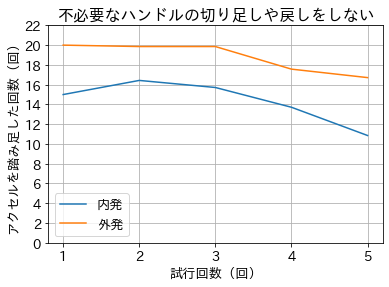

スピード一定に気をつけた時のアクセル踏んだ回数
内発[14.714285714285714, 13.142857142857142, 12.714285714285714, 12.285714285714286, 9.142857142857142]
平均12.4
外発[21.857142857142858, 17.571428571428573, 18.142857142857142, 16.428571428571427, 14.857142857142858]
平均17.771428571428572
試行回数（回）


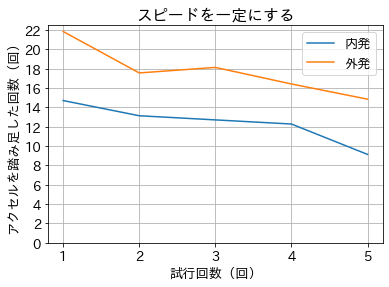

In [ ]:
#内発　ｖｓ　外発
# 昼なら5、夜なら7
a=[]
b=[]

def graph(day_or_night,yoko,tate,title,tatehaba):
  a=[]
  for i in range(5):
    count=0
    num=0
    for id in range(27):
      if member[id][2]=="A":
        count+=1
        num+=member[id][day_or_night][i]
    a.append(num/count)
  print("内発"+str(a))
  print("平均"+str(np.average(a)))

  b=[]
  for i in range(5):
    count=0
    num=0
    for id in range(27):
      if member[id][2]=="B":
        count+=1
        num+=member[id][day_or_night][i]
    b.append(num/count)
  print("外発"+str(b))
  print("平均"+str(np.average(b)))
  plot(a,ｂ,yoko,tate,title,tatehaba)
  plt.show()



#内発　ｖｓ　外発
# 昼なら5、夜なら7
#高頻度2を引く

def minigraphno2(day_or_night,yoko,tate,title,tatehaba):
  a=[]
  for i in range(5):
    count=0
    num=0
    for id in range(27):
      if not member[id][4]==2:
        if not member[id][3]==0:
          if member[id][2]=="A":
            count+=1
            num+=member[id][day_or_night][i]
    a.append(num/count)
  print("内発"+str(a))
  print("平均"+str(np.average(a)))
  # for id in range(27):
  #   if not member[id][4]==2:
  #     if not member[id][3]==0:
  #       if member[id][2]=="A":
  #         print(member[id][day_or_night])

  b=[]
  for i in range(5):
    count=0
    num=0
    for id in range(27):
      if not member[id][4]==2:
        if not member[id][3]==0:
          if member[id][2]=="B":
            count+=1
            num+=member[id][day_or_night][i]
    b.append(num/count)
  print("外発"+str(b))
  print("平均"+str(np.average(b)))
  # for id in range(27):
  #   if not member[id][4]==2:
  #     if not member[id][3]==0:
  #       if member[id][2]=="B":
  #         print(member[id][day_or_night])
  miniplot(a,ｂ,tate,tate,title,tatehaba)
  plt.show()

def graphno2(day_or_night,yoko,tate,title,tatehaba):
  a=[]
  for i in range(5):
    count=0
    num=0
    for id in range(27):
      if not member[id][4]==2:
        if not member[id][3]==0:
          if member[id][2]=="A":
            # print(member[id][1])
            count+=1
            num+=member[id][day_or_night][i]
    a.append(num/count)
  print("内発"+str(a))
  print("平均"+str(np.average(a)))
  # for id in range(27):
  #   if not member[id][4]==2:
  #     if not member[id][3]==0:
  #       if member[id][2]=="A":
  #         print(member[id][day_or_night])

  b=[]
  for i in range(5):
    count=0
    num=0
    for id in range(27):
      if not member[id][4]==2:
        if not member[id][3]==0:
          if member[id][2]=="B":
            count+=1
            num+=member[id][day_or_night][i]
    b.append(num/count)
  print("外発"+str(b))
  print("平均"+str(np.average(b)))
  # for id in range(27):
  #   if not member[id][4]==2:
  #     if not member[id][3]==0:
  #       if member[id][2]=="B":
  #         print(member[id][day_or_night])
  plot(a,ｂ,yoko,tate,title,tatehaba)
  plt.show()

# #修正舵
# graph(5,"試行回数","修正舵回数","昼の修正舵回数",16)
# graph(6,"試行回数","修正舵回数","夜の修正舵回数",16)

# graphno2(5,"試行回数","修正舵回数","高頻度2抜き夜の修正舵回数",16)
# graphno2(6,"試行回数","修正舵回数","高頻度2抜き夜の修正舵回数",16)

# #アクセル操作量
# print("修正舵に気をつけた時のアクセル踏んだ回数")
# graph(7,"試行回数","アクセル踏んだ回数","昼のアクセル踏んだ回数",8)
# graph(8,"試行回数","アクセル踏んだ回数","夜のアクセル踏んだ回数",8)

# print("スピード一定に気をつけた時のアクセル踏んだ回数")
# graph(15,"試行回数","アクセル踏んだ回数","昼のアクセル踏んだ回数",8)
# graph(16,"試行回数","アクセル踏んだ回数","夜のアクセル踏んだ回数",8)

# #アクセル操作量
# print("修正舵に気をつけた時のアクセル踏んだ回数")
# graphno2(7,"試行回数","アクセル踏んだ回数","高頻度2抜き昼のアクセル踏んだ回数",8)
# graphno2(8,"試行回数","アクセル踏んだ回数","高頻度2抜き夜のアクセル踏んだ回数",8)

# print("スピード一定に気をつけた時のアクセル踏んだ回数")
# graphno2(15,"試行回数","アクセル踏んだ回数","高頻度2抜き昼のアクセル踏んだ回数",8)
# graphno2(16,"試行回数","アクセル踏んだ回数","高頻度2抜き夜のアクセル踏んだ回数",8)

# #アクセル操作量
# print("修正舵に気をつけた時のアクセル踏んだ回数")
# graph(17,"試行回数","アクセル踏んだ回数","昼のアクセル踏んだ回数",20)
# graph(18,"試行回数","アクセル踏んだ回数","夜のアクセル踏んだ回数",20)

# print("スピード一定に気をつけた時のアクセル踏んだ回数")
# graph(21,"試行回数","アクセル踏んだ回数","昼のアクセル踏んだ回数",20)
# graph(22,"試行回数","アクセル踏んだ回数","夜のアクセル踏んだ回数",20)

#アクセル操作量
print("修正舵に気をつけた時のアクセル踏んだ回数")
graphno2(17,"試行回数（回）","アクセルを踏み足した回数（回）","不必要なハンドルの切り足しや戻しをしない",24)
# graphno2(18,"試行回数（回）","アクセルを踏み足した回数（回）","不必要なハンドルの切り足しや戻しをしない",24)

print("スピード一定に気をつけた時のアクセル踏んだ回数")
graphno2(21,"試行回数（回）","アクセルを踏み足した回数（回）","スピードを一定にする",24)
# graphno2(22,"試行回数（回）","アクセルを踏み足した回数（回）","不必要なハンドルの切り足しや戻しをしない",24)


# print("修正舵に気をつけた時のアクセル踏んだ回数")
# graphno2(23,"試行回数","積分量","昼の中央からのずれ",120)
# graphno2(24,"試行回数","積分量","夜の中央からのずれ",120)

# print("左右の幅に気をつけた時のアクセル踏んだ回数")
# graphno2(25,"試行回数","積分量","昼の中央からのずれ",120)
# graphno2(26,"試行回数","積分量","夜の中央からのずれ",120)

# print("スピード一定に気をつけた時のアクセル踏んだ回数")
# graphno2(27,"試行回数","積分量","昼の中央からのずれ",120)
# graphno2(28,"試行回数","積分量","夜の中央からのずれ",120)

# print("修正舵に気をつけた時のスピード標準偏差")
# minigraphno2(29,"試行回数","積分量","昼のスピード標準偏差",1)
# minigraphno2(30,"試行回数","積分量","夜のスピード標準偏差",1)

# print("左右の幅に気をつけた時のアクセル踏んだ回数")
# minigraphno2(31,"試行回数","積分量","昼のスピード標準偏差",1)
# minigraphno2(32,"試行回数","積分量","夜のスピード標準偏差",1)

# print("スピード一定に気をつけた時のアクセル踏んだ回数")
# minigraphno2(33,"試行回数","積分量","昼のスピード標準偏差",1)
# minigraphno2(34,"試行回数","積分量","夜のスピード標準偏差",1)